In [1]:
import numpy as np
from numpy import linalg as LA

import pandas as pd
from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map
from qiskit.visualization.array import array_to_latex
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import hellinger_fidelity, random_statevector, Statevector
from qiskit.quantum_info import Operator


from qiskit_ibm_provider import IBMProvider

from qiskit_aer import AerSimulator


# Plotting tools
import matplotlib.pyplot as plt

In [2]:
#IBMProvider.save_account("Your_Token", overwrite=True)
#provider = IBMProvider()

#밋업을 위해 추가된 허브와 그룹, 프로젝트를 프로바이더에 설정
provider = IBMProvider(instance="ibm-q-yonsei/internal/qc-and-simulatio")

In [3]:
from qiskit_ibm_provider import least_busy

real_backend = least_busy(provider.backends())
real_backend

<IBMBackend('ibm_auckland')>

# Pauli Gates

## Single Qubit Quantum states <a name="single_states"/>

단일 큐비트의 양자 상태는 다음과 같이 쓸수 있음을 앞서 살펴보았습니다.

$$\left|\psi\right\rangle = \alpha|0\rangle + \beta|1\rangle$$


여기에서 $\alpha$ 와 $\beta$는 복소수 입니다. 측정에 의해서 큐비트가 $\left|0\right\rangle$ 로 측정될 확률은 $|\alpha|^2$이고 $\left|1\right\rangle$로 측정될 확률은 $|\beta|^2$입니다. 양자 상태는 벡터로 다음과 같이도 쓸수 있습니다.

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

측정될 확률의 합이 $|\alpha|^2+ |\beta|^2 = 1$ 이고,  전역 위상은 측정에 영향을 미치지 않기 때문에 $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ 큐비트의 양자 상태를 표현하기 위해서는 사실은 두개의 실수만 있어도 됩니다.

그 형태는 다음과 같습니다.

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

여기에서 $0\leq \phi < 2\pi$, 이며 $0\leq \theta \leq \pi$ 입니다.  이로부터, 양자상태 ($\mathbb{C}^2$) 와 블로흐 구면의 점($\mathbb{R}^3$)은 1:1로 매칭된다는 것을 알 수 있습니다. 이 방식을 큐비트 상태의 블로흐 구면 표현법이라고 부릅니다.

앞으로 우리는 단일 양자 게이트를 살펴보게 될 것입니다. Qiskit의 단일, 및 다중 양자 게이트의 종류와 설명은 Qiskit Tutorial의 [이곳](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)에서 찾아보실 수 있습니다. 

실습을 시작하기 전 필요한 라이브러리들을 불러들입니다.

In [4]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity

import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to render plots
%matplotlib inline

## Pauli gates

### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi) = |0\rangle\langle 1| + |1\rangle \langle 0|
$$

$$X|0\rangle = |1\rangle$$
$$X|1\rangle = |0\rangle$$


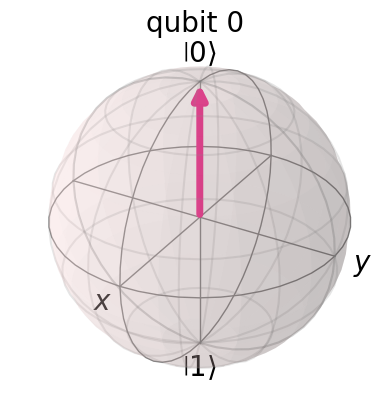

In [5]:
x_gate=QuantumCircuit(1) # Create a quantum circuit with 1 qubit
Statevector(x_gate).draw('bloch')

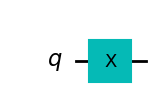

In [6]:
x_gate.x(0)
x_gate.draw(output='mpl')

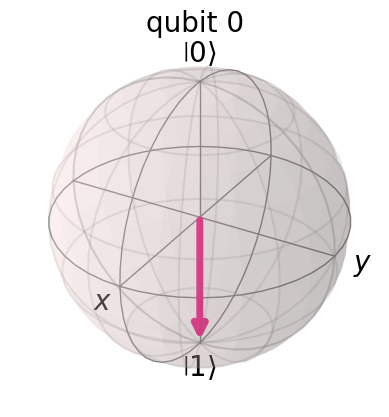

In [7]:
Statevector(x_gate).draw('bloch')

In [8]:
x_gate.measure_all()

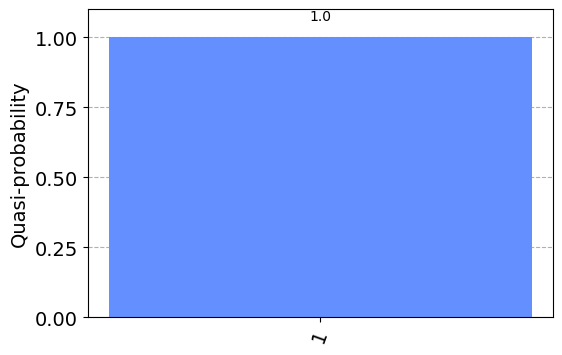

In [9]:
backend = AerSimulator()

job = backend.run(x_gate, shots=10000) #shot
results = job.result()
counts = results.get_counts()

plot_distribution(counts, figsize=(6, 4))

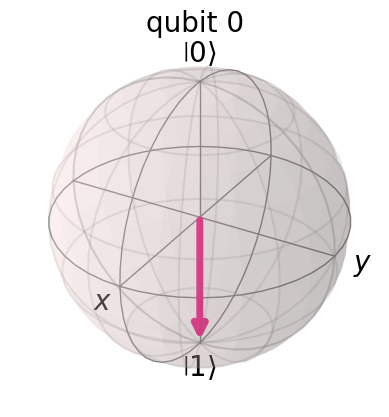

In [10]:
qc = QuantumCircuit(1)
qc.x(0)
Statevector(qc).draw('bloch')

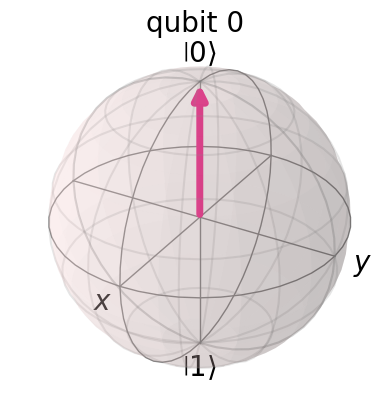

In [11]:
qc.barrier()
qc.x(0)
Statevector(qc).draw('bloch')

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

$$
Y  =  -i|0\rangle\langle 1| + i|1\rangle \langle 0|
$$

$$Y|0\rangle = i|1\rangle$$
$$Y|1\rangle = -i|0\rangle$$

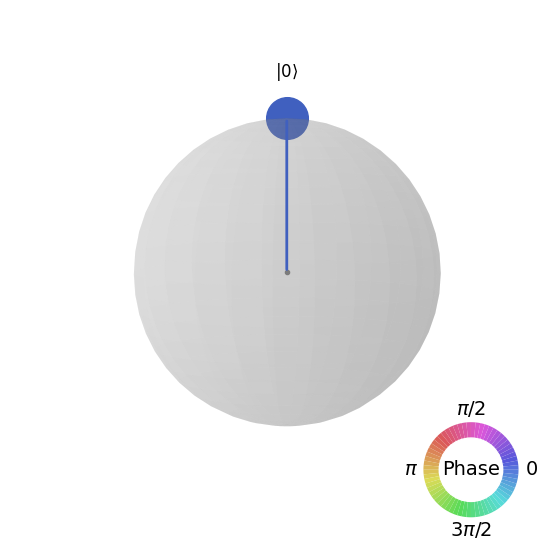

In [12]:
y_gate = QuantumCircuit(1)
Statevector(y_gate).draw('qsphere')

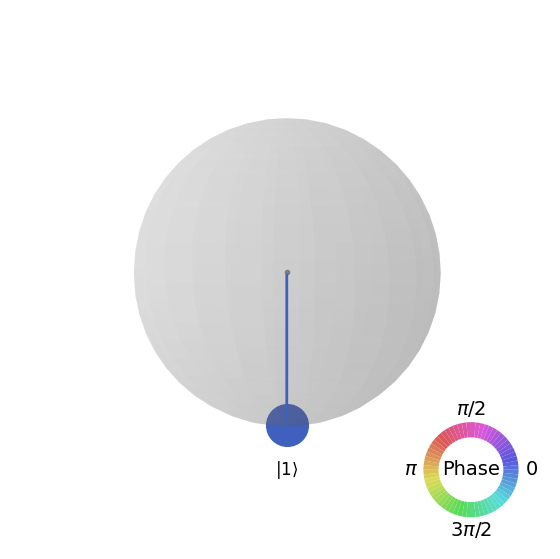

In [13]:
y_gate.y(0)
Statevector(y_gate).draw('qsphere')

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

$$
Z  =  |0\rangle\langle 0| + -|1\rangle \langle 1|
$$

$$Z|0\rangle = |0\rangle$$
$$Z|1\rangle = -|1\rangle$$

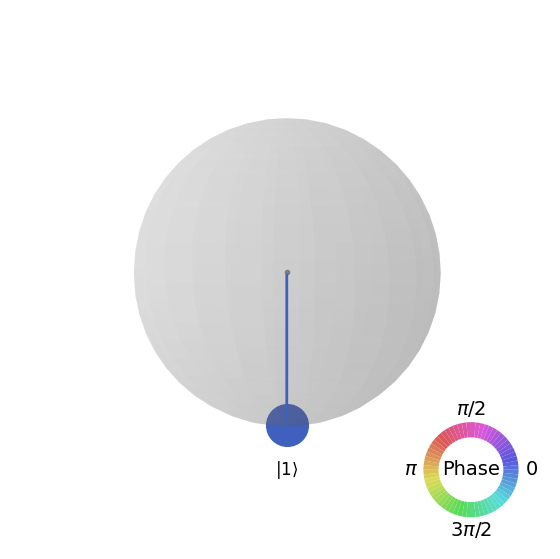

In [14]:
z_gate = QuantumCircuit(1)
z_gate.x(0)  
Statevector(z_gate).draw('qsphere')

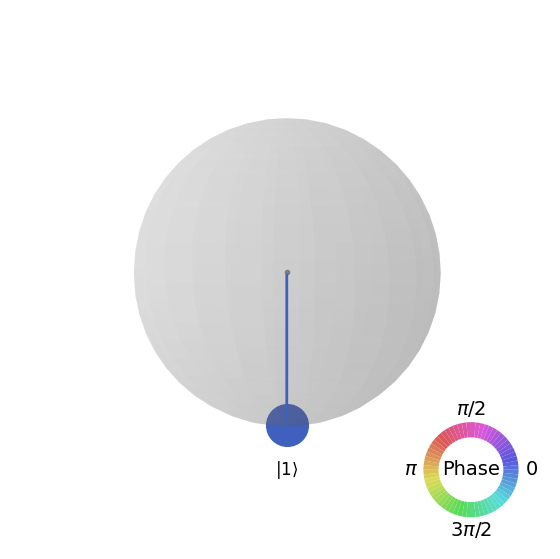

In [15]:
z_gate.z(0)  
Statevector(z_gate).draw('qsphere')

위의 그림, 뭔가 이상하지 않으신가요? :) 네 맞아요 버그입니다. https://quantum-computing.ibm.com/ 의 circuit composer를 사용해서 정확한 phase를 살펴봅시다.

- [Y Gate 결과](https://quantum-computing.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcICqYAuBLVAbGATABAMboBOhArpiADQgCOEAzlAiAPIAKAogHICKAQQDKAWXwAmAHQAGANwAdMOjCEs5XDHzz6MLOgBGARknLC2hWEV0SMAOb46AbUMBdC4Rv3CjgCxvFAJ4OjtJuNCAajB7oAA4YAPZgrCAAvkA)
- [Z Gate 결과](https://quantum-computing.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcICqYAuBLVAbGATABAMboBOhArpiADQgCOEAzlAiAPIAKAogHICKAQQDKAWXwAmAHQAGANwAdMOjCEs5XDHzz6MLOgBGARknLC2hWEV0SMAOb46AbUMBdC4Rv3CjgCxvFAB4OjtL%2BYPoQJCToMCTBoRYAXvFuNCAajB7oAA4YAPZgrCAAvkA)

이 버그와 관련하여 repository에 있는 issue를 살펴봅시다.

!! Code Contribution Chance !!
https://github.com/Qiskit/qiskit-terra/issues/7512

Qiskit은 여러분의 Contribution을 기다리고 있습니다! :) 이 이슈들 외에도 여러분이 기여할 수 있는 이슈들을 찾아서 해결해 보세요!

<div class="alert alert-block alert-info"> <b>긴급 점검!</b> <br>
    다음을 양자회로로 구현해 봅시다! $$ZYX|0\rangle$$ </div>


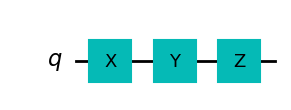

In [16]:
qc = QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.draw('mpl')

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 퀴즈 9번, 10번을 풀고 노트북으로 돌아옵시다! </div>


## 2. Digression: The X, Y & Z-Bases

이번 챕터에서는 X, Y, Z 게이트의 유니터리 행렬을 얻어보고, 그의 Eigen Vector와 Eigen Value를 계산해 봅시다.

In [17]:
qc = QuantumCircuit(1)
qc.x(0)
Ux=Operator(qc).to_matrix()

In [18]:
w, v = LA.eig(Ux)
display(array_to_latex(w))
display(array_to_latex(v))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
qc = QuantumCircuit(1)
qc.y(0)
Uy=Operator(qc).to_matrix()
w, v = LA.eig(Uy)
display(array_to_latex(w))
display(array_to_latex(v))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

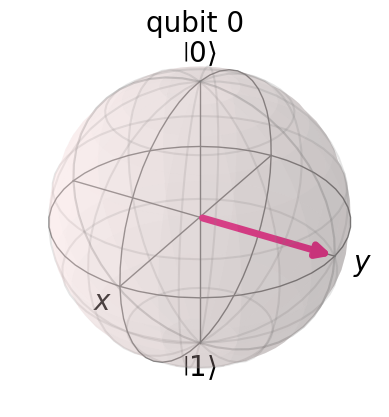

In [20]:
#R state
eigen_y1 = v[0]
plot_bloch_multivector(eigen_y1)

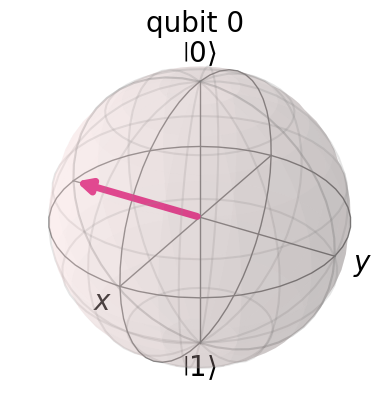

In [21]:
eigen_y2 = v[1]
plot_bloch_multivector(eigen_y2)

In [22]:
qc = QuantumCircuit(1)
qc.z(0)
Uz=Operator(qc).to_matrix()
w, v = LA.eig(Uz)
display(array_to_latex(w))
display(array_to_latex(v))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 퀴즈 11번, 12번을 풀고 노트북으로 돌아옵시다! </div>


## 3. The Hadamard Gate

A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$. What the Hadamard does is to transform between the $|0\rangle$ $|1\rangle$ and the $|+\rangle$ $|-\rangle$ base. 

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

$$
H  = |+\rangle\langle 0| + |-\rangle \langle 1|
$$

$$H|0\rangle = |+\rangle$$
$$H|1\rangle = |-\rangle$$

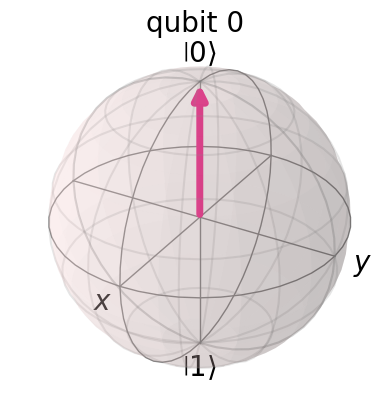

In [23]:
# Let's do an H-gate on a |0> qubit
h_gate = QuantumCircuit(1)
Statevector(h_gate).draw('bloch')

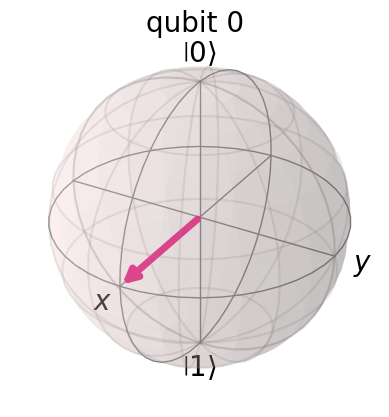

In [24]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

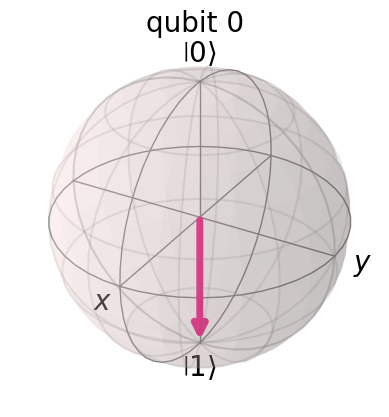

In [25]:
h_gate = QuantumCircuit(1)
h_gate.x(0)
Statevector(h_gate).draw('bloch')

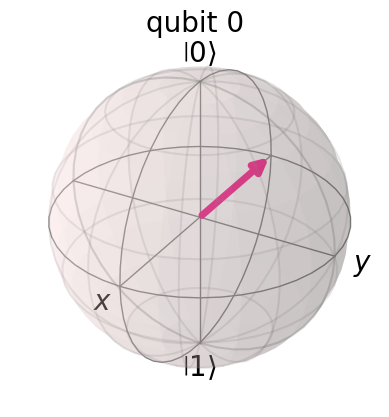

In [26]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

### Commutation relation of pauli gates

파울리 메트리스의 성질로 인해, 파울리 게이트들도 재미있는 결합법을 지니고 있습니다. 

$$XY = iZ$$
$$YZ = iX$$
$$ZX = iY$$

노트) $ H = \frac{1}{\sqrt{2}} (X + Z)$, 이므로
$$HZH = \frac{1}{2}(X + Z)Z(X+Z) = (XZ + ZZ)(X + Z) = \frac{1}{2}(-iY + I)(X + Z) = \frac{1}{2}(-iYX + X -iYZ + Z) = \frac{1}{2}(-Z + X +X + Z) = X $$

In [27]:
#reference
qc = QuantumCircuit(1)
qc.y(0)
array_to_latex(Operator(qc).to_matrix())

<IPython.core.display.Latex object>

In [28]:
#방법 1 - pauli gate의 성질 이용
qc = QuantumCircuit(1)
qc.z(0)
qc.x(0)
array_to_latex(Operator(qc).to_matrix())

<IPython.core.display.Latex object>

In [35]:
#방법 2 - transpiler 이용

qc = QuantumCircuit(1)
qc.y(0)
target_basis = ['x', 'z', 'h', 's']
transpile(qc,basis_gates=target_basis, optimization_level=3).draw('mpl')

In [32]:
array_to_latex(Operator(qc).to_matrix())

<IPython.core.display.Latex object>

In [36]:
#위의 회로를 직접 수정
qc = QuantumCircuit(1)
qc.z(0)
qc.h(0)
qc.z(0)
qc.h(0)
array_to_latex(Operator(qc).to_matrix())

<IPython.core.display.Latex object>

## 4. Digression: Measuring in Different Bases

양자 회로의 측정에 임의의 연산 U를 적용한 후 Z-basis로 측정할 때, 이 연산이 어떤 영향을 미치는지 살펴 봅시다.

이 경우 측정의 기대값은 
$$\langle \psi U^{\dagger}| Z | U \psi \rangle = \langle \psi | U^{\dagger}ZU | \psi \rangle $$
이 됩니다. 이때
$$ \langle \psi | U^{\dagger}ZU | \psi \rangle = U^{\dagger}|0\rangle\langle 0|U + U^{\dagger}|1\rangle\langle 1|U$$
이 때, $U^{\dagger}|0\rangle = |\phi_0\rangle$로 $U^{\dagger}|1\rangle = |\phi_1\rangle$이라 정의하면, $|\phi_0\rangle$ 과 $|\phi_1\rangle$은 서로 직교하는 새로운 계산 basis가 되고 
$$|\phi_0\rangle\langle\phi_0 | + |\phi_1\rangle\langle \phi_1|$$
이 되어, 새로운 베이시스로 측정되는 효과를 갖게 됩니다.

이 방식을 X-basis로 계산하기 위해 H 게이트를 측정 전에 적용 하는 원리로 살펴 보면,
$H^{\dagger} = H$이므로, 양자 회로의 측정 전 H 게이트를 적용하는 것은 곧 $H|0\rangle = |+\rangle$과 $H|1\rangle = |-\rangle$로 회로를 측정하는 것과 동일함을 의미합니다.

Y-게이트의 basis인 $|R\rangle$과 $|L\rangle$을 만들기 위해서 다음을 확인해 봅시다.

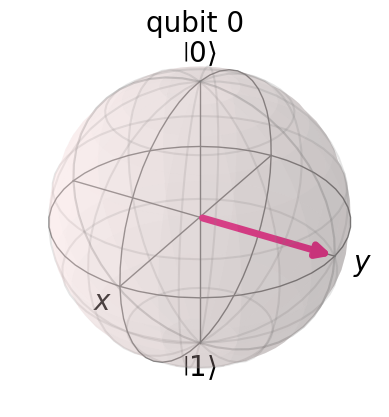

In [37]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
Statevector(qc).draw('bloch')

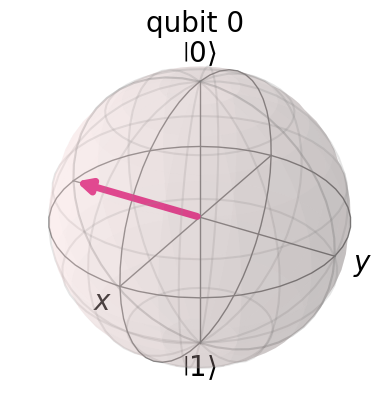

In [38]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.s(0)
Statevector(qc).draw('bloch')

즉, $U^{\dagger} = SH$ 이므로, 적용해야 하는 유니터리는, $HS^{\dagger}|\psi\rangle$가 됩니다. 양자 회로로 구현하면 순서에 주의하여 다음과 같습니다.

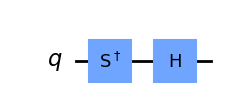

In [39]:
qc = QuantumCircuit(1)
qc.sdg(0)
qc.h(0)
qc.draw('mpl')

작성한 회로가 잘 동작하는지 확인해 봅시다. 먼저 $|R\rangle$ 상태로 큐비트를 초기화 한 후, y축으로 측정을 하고 결과를 확인합니다.

In [40]:
initial_state = [-sqrt(1/2)*1j ,sqrt(1/2)]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

qc.draw('mpl') 

In [41]:
qc.sdg(0)
qc.h(0)

In [42]:
state = Statevector(qc)
state.sample_counts(shots=10000)

{'0': 10000}

$|0\rangle$과 대응되는 $|R\rangle$상태로 100%의 확률로 측정이 됩니다. 다음으로 회로를 $|L\rangle$ 상태로 초기화 한 후 동일하게 측정해 보겠습니다.

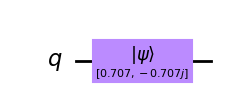

In [43]:
initial_state = [sqrt(1/2), -sqrt(1/2)*1j ]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

qc.draw('mpl') 

In [44]:
qc.sdg(0)
qc.h(0)
state = Statevector(qc)
state.sample_counts(shots=10000)

{'1': 10000}

## other single qubit gates

### P Gate
Parameterized Phase Gate:

$$
P(\phi) = 
\begin{pmatrix}
1 & 0\\
0 & e^{i\phi}
\end{pmatrix}
$$

$$
P(\phi)  =  |0\rangle\langle 0| + e^{i\phi}|1\rangle \langle 1|
$$

$$P(\phi)|0\rangle = |0\rangle$$
$$P(\phi)|1\rangle = e^{i\phi}|1\rangle$$

P Gate를 중첩 상태에 반복적으로 적용하면서 statevector가 bloch구면에서 회전 하는 것을 살펴봅시다.

In [45]:
qc = QuantumCircuit(1)
qc.h(0)

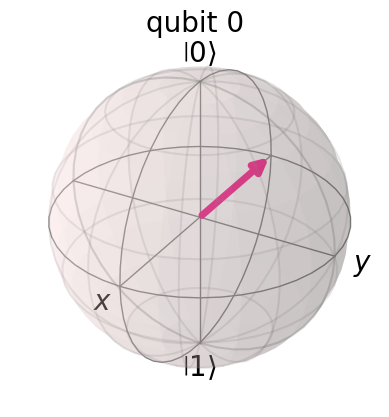

In [53]:
#여러번 실행해 보세요
qc.p(pi/8, 0)
Statevector(qc).draw('bloch')

### I Gate
Idendity Gate:

$$
I = 
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
$$

$$
I  =  |0\rangle\langle 0| + |1\rangle \langle 1|
$$

$$I|0\rangle = |0\rangle$$
$$I|1\rangle = |1\rangle$$

I gate의 eigenvector를 다음과 같이 numpy를 사용해 구해봅시다. 

In [55]:
qc = QuantumCircuit(1)
qc.i(0)
Uz=Operator(qc).to_matrix()
w, v = LA.eig(Uz)
display(array_to_latex(w))
display(array_to_latex(v))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### S Gate
Phase Gate with $\phi = \pi/2$:

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & e^{i\frac{\pi}{2}}
\end{pmatrix}
$$

$$
S  =  |0\rangle\langle 0| + e^{i\frac{\pi}{2}}|1\rangle \langle 1|
$$

$$S|0\rangle = |0\rangle$$
$$S|1\rangle = e^{i\frac{\pi}{2}}|1\rangle$$

S Gate는 $\phi = \frac{\pi}{2}$로 값이 고정된 P 게이트와 같습니다. 따라서 S게이트를 두번 연산한 것은 Z 게이트와 동일하고, Z 게이트는 $\phi = \pi$인 P 게이트라 보아도 무방합니다.

P 게이트와 마찬가지로 블로흐 구면을 그려서 동작을 확인해봅시다.

In [56]:
qc = QuantumCircuit(1)
qc.h(0)

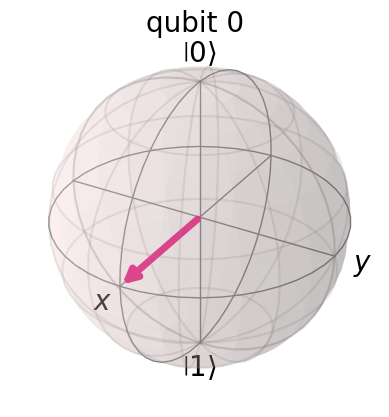

In [60]:
#여러번 실행해 보세요
qc.s(0)
Statevector(qc).draw('bloch')

### T Gate
Phase Gate with $\phi = \pi/4$:

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i\frac{\pi}{4}}
\end{pmatrix}
$$

$$
T  =  |0\rangle\langle 0| + e^{i\frac{\pi}{4}}|1\rangle \langle 1|
$$

$$T|0\rangle = |0\rangle$$
$$T|1\rangle = e^{i\frac{\pi}{4}}|1\rangle$$

S Gate와 마찬가지로 T Gate는 $\phi = \frac{\pi}{4}$로 값이 고정된 P 게이트와 같습니다. 실습은 생략하도록 하겠습니다.

### The U-gate
General single-qubit quantum gates

$$
U(\theta, \phi, \lambda) = 
\begin{pmatrix}
cos(\frac{\theta}{2}) & -e^{i\lambda}sin(\frac{\theta}{2})\\
e^{i\phi}sin(\frac{\theta}{2}) & e^{i(\phi + \lambda)}cos(\frac{\theta}{2})
\end{pmatrix}
$$

다음은 몇가지 잘 알려진 게이트의 U Gate 형식 입니다.
$$H = U(\frac{\pi}{2}, 0 , \pi)$$
$$P(\lambda) = U(0, 0, \lambda)$$

양자 회로를 작성할때, U 게이트는 많이 사용하지는 않습니다. 알고리즘 적인 원리를 파악하기 위해 기본 게이트들을 사용하기 때문이라고 개인적으로 생각합니다. 

### Rotational Gate

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = U(\theta, -\pi/2,\pi/2)
$$

#### Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =U(\theta,0,0)
$$

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}
$$

여기에서 주의해야 할 것은, $R_z$ 게이트를 $\pi$만큼 회전한 것과 Z 게이트를 적용하는 결과에 차이가 있다는 것입니다. 비교를 위해 랜덤 Statevector를 생성하고 각각 Rz게이트를 $\pi$만큼, 그리고 Z 게이트를 적용한 후 QSphere 결과를 비교해 보겠습니다.

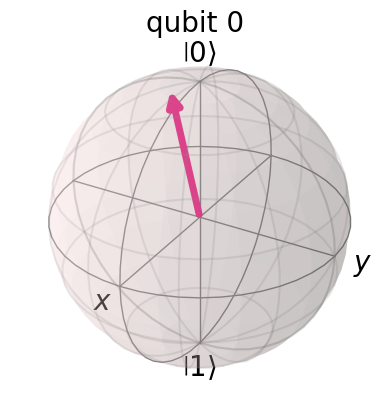

In [64]:
initial_state = random_statevector(2) 

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

Statevector(qc).draw('bloch')

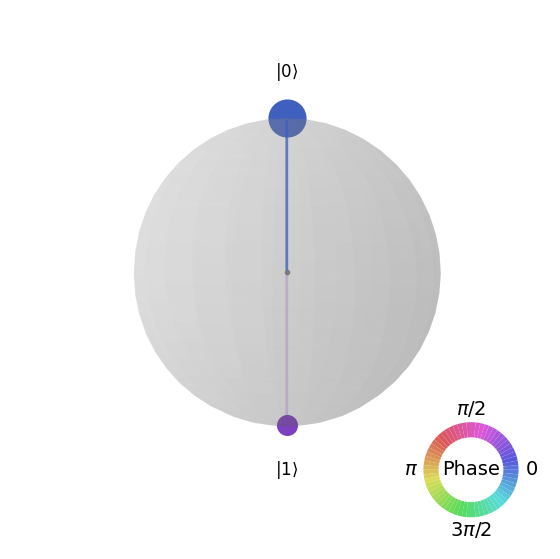

In [65]:
qc.rz(pi,0)
Statevector(qc).draw('qsphere')

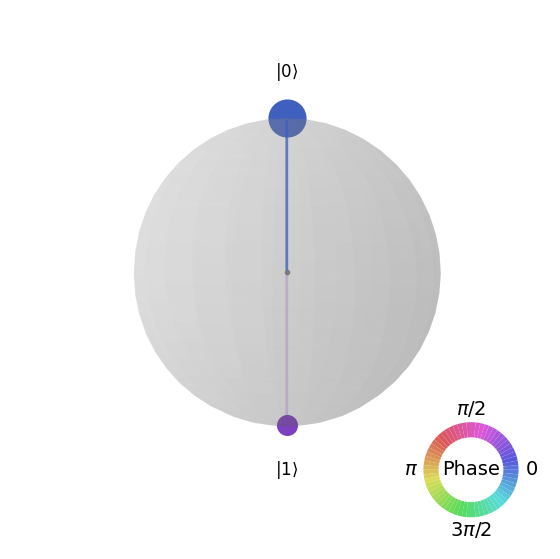

In [66]:
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.z(0)
Statevector(qc).draw('qsphere')

일반적으로 양자 백엔드들은 회로를 실제로 실행하기 위해 몇가지 기본 게이트들을 가지고 있는데, 이런 일반 게이트로 회로를 작성 한 후에는 반드시, Transpile이라는 과정을 거쳐서 회로를 백엔드에 실행할 수 있도록 변환해 주어야 합니다. 

다음으로 넘어가기 전, 양자 백엔드의 설정값 및 기본 게이트를 확인하는 방법과, 그 기본 게이트로 회로가 transpile되는 과정을 간단하게 살펴보도록 하겠습니다.

In [67]:
real_backend

<IBMBackend('ibm_auckland')>

In [69]:
conf = real_backend.configuration()

In [70]:
print('backend:{}'.format(backend.name))
print('num_qubit:{}, QV:{}, CLOP:{}\n'.format(conf.num_qubits, conf.quantum_volume, conf.clops))
print('max_num_circuits:{},'.format(conf.max_experiments), 
      'max_shots:{}\n'.format(conf.max_shots)) #default num_shots = 4000
print('basis gates:{}'.format(conf.basis_gates),'\n')
print('coupling map:{}'.format(conf.coupling_map))

backend:<bound method AerSimulator.name of AerSimulator('aer_simulator')>
num_qubit:27, QV:64, CLOP:2419

max_num_circuits:2000, max_shots:100000

basis gates:['cx', 'id', 'rz', 'sx', 'x'] 

coupling map:[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]


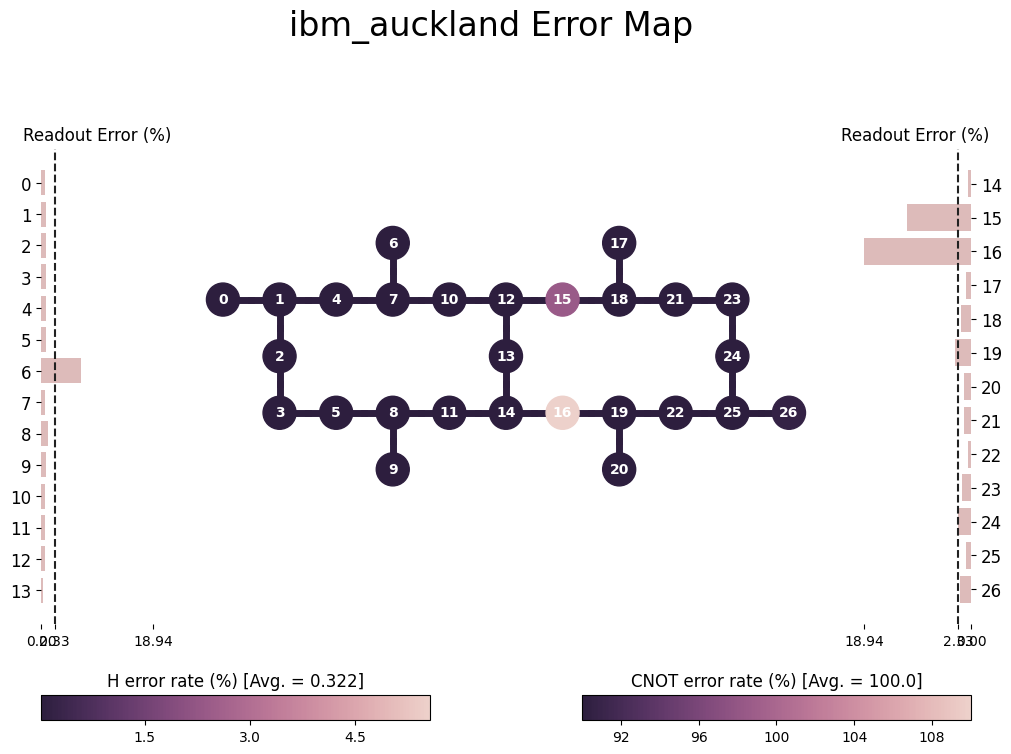

In [71]:
plot_error_map(real_backend)

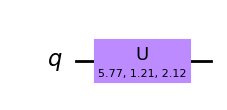

In [72]:
# make a random general gate
rand = np.random.uniform(0,2*pi,3)

qc = QuantumCircuit(1)
qc.u(rand[0], rand[1], rand[2], 0)
qc.draw('mpl')

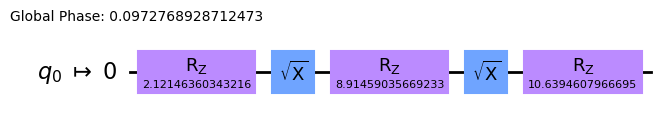

In [74]:
tr_qc = transpile(qc, real_backend)
#display(tr_qc.draw('mpl'))
display(tr_qc.draw('mpl', idle_wires=False))